In [50]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
data=pd.read_csv('Ecommerce Customers')

In [6]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [7]:
data.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [9]:
data.corr()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
Avg. Session Length,1.000000,-0.027826,-0.034987,0.060247,0.355088
Time on App,-0.027826,1.000000,0.082388,0.029143,0.499328
Time on Website,-0.034987,0.082388,1.000000,-0.047582,-0.002641
Length of Membership,0.060247,0.029143,-0.047582,1.000000,0.809084
Yearly Amount Spent,0.355088,0.499328,-0.002641,0.809084,1.000000


<AxesSubplot:>

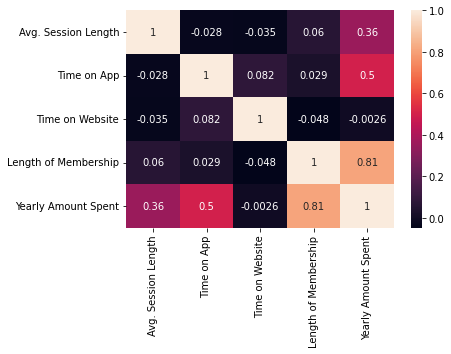

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

D:\ml\new\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
D:\ml\new\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


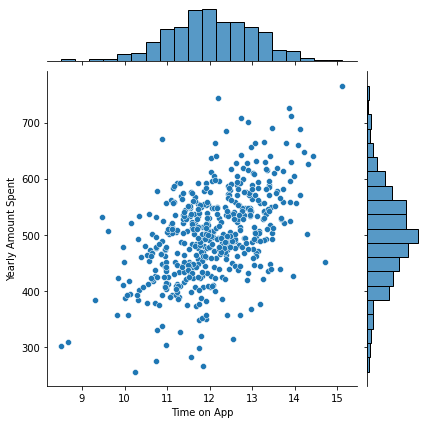

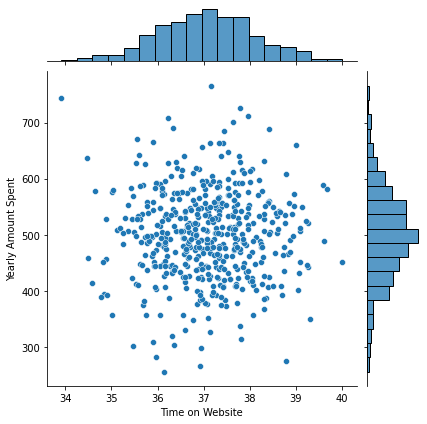

In [22]:
# sns.jointplot(data['Time on App'],data['Yearly Amount Spent'])
# sns.jointplot(data['Time on Website'],data['Yearly Amount Spent'])

D:\ml\new\ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


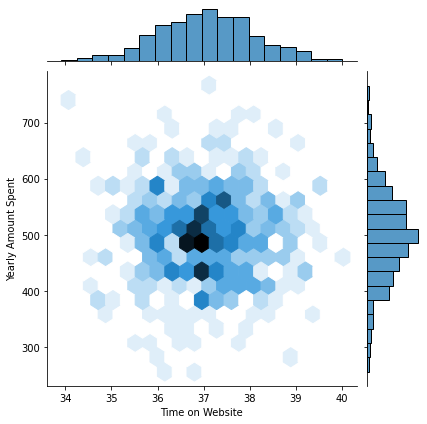

In [23]:
sns.jointplot(data['Time on Website'],data['Yearly Amount Spent'],kind='hex')

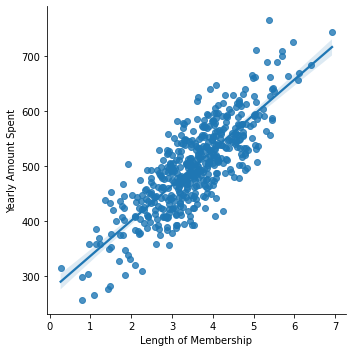

In [30]:
# sns.jointplot(data['Time on Website'],data['Yearly Amount Spent'])
# sns.lmplot(x='Time on Website',y='Yearly Amount Spent',data=data)
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=data)

In [31]:
data.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [33]:
X=data[[
    'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership'
]]

In [34]:
y=data['Yearly Amount Spent']

In [36]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [46]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [47]:
model.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [48]:
predictions=model.predict(X_test)

Text(0, 0.5, 'Predicted values')

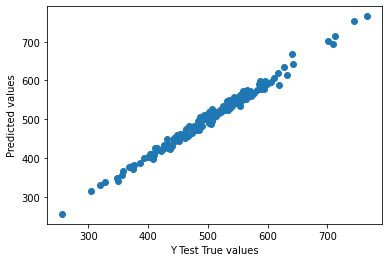

In [56]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test True values')
plt.ylabel('Predicted values')

In [57]:
from sklearn import metrics

In [67]:
print('MAE',metrics.mean_absolute_error(y_test,predictions))
print('MSE',metrics.mean_squared_error(y_test,predictions))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE 7.228148653430826
MSE 79.81305165097427
RMSE 8.933815066978624


In [68]:
metrics.explained_variance_score(y_test,predictions)

0.9890771231889606

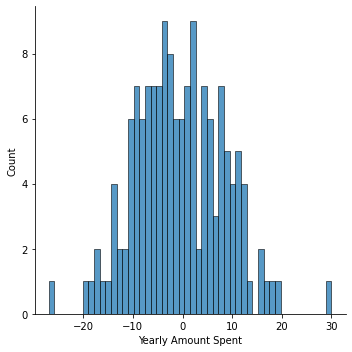

In [71]:
sns.displot((y_test-predictions),bins=50)

In [76]:
pd.DataFrame(model.coef_,X.columns,columns=['Coeff'])

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


In [77]:
X.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership'],
      dtype='object')

In [80]:
X_test,y_test

(     Avg. Session Length  Time on App  Time on Website  Length of Membership
 18             32.187812    14.715388        38.244115              1.516576
 361            32.077590    10.347877        39.045156              3.434560
 104            31.389585    10.994224        38.074452              3.428860
 4              33.330673    12.795189        37.536653              4.446308
 156            32.294642    12.443048        37.327848              5.084861
 ..                   ...          ...              ...                   ...
 147            32.255901    10.480507        37.338670              4.514122
 346            32.765665    12.506548        35.823467              3.126509
 423            33.128693    10.398458        36.683393              3.859818
 17             32.338899    12.013195        38.385137              2.420806
 259            32.096109    10.804891        37.372762              2.699562
 
 [150 rows x 4 columns],
 18     452.315675
 361    401.033135

In [95]:
let_columns=X.columns
let_values=[
    '32.096109','10.804891','37.372762','2.699562'
]
let_df=pd.DataFrame([let_values],columns=X.columns)

In [96]:
let_df

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,32.096109,10.804891,37.372762,2.699562


In [97]:
model.predict(let_df)

array([375.47902021])